In [57]:
# import our usual things
%matplotlib inline
import ipywidgets
import pandas as pd
import matplotlib.pyplot as plt
import geopandas 
import contextily as ctx
import numpy as np
import bqplot

In [58]:
gdf_councils = geopandas.read_file('https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson')

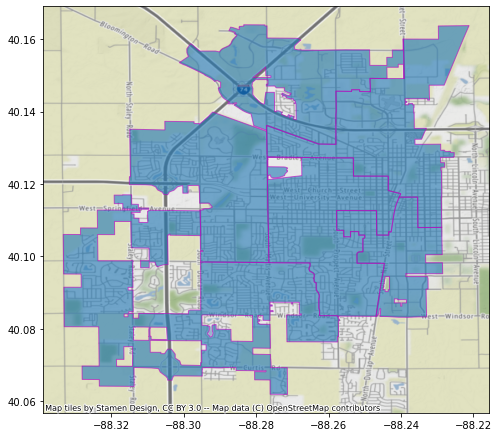

In [60]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
gdf_councils.plot(ax=ax, alpha=0.6, edgecolor='m')
ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

In [61]:
gdf_apts = geopandas.read_file('https://opendata.arcgis.com/datasets/64154052c5a040e287bae1583d727825_8.geojson')

In [62]:
gdf_apts.head()

,OBJECTID,Address,Parcel,Units,Stories,UniqueID,Building_Name,Complex_Name,Case_Number,Building_Type,...,Comments,Safety_Comments,Fire_Alarms,Sprinkler,Managing_Company,MFRecyclingStatus,ShapeSTArea,ShapeSTLength,Shape,geometry
0,1,2009 Moreland Blvd,412001126038,36,3,0.0,2009 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,19657.997437,929.167804,None,"POLYGON ((-88.25315 40.14017, -88.25315 40.140..."
1,2,2011 Moreland Blvd,412001126038,36,3,1.0,2011 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,19735.512329,950.194217,None,"POLYGON ((-88.25260 40.14057, -88.25256 40.140..."
2,3,2007 Moreland Blvd,412001126038,24,3,2.0,2007 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,13970.178833,678.398035,None,"POLYGON ((-88.25274 40.14045, -88.25274 40.140..."
3,4,2003 Moreland Blvd,412001126038,36,3,3.0,2003 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,19739.423340,941.358477,None,"POLYGON ((-88.25154 40.13978, -88.25156 40.139..."
4,5,2005 Moreland Blvd,412001126038,24,3,4.0,2005 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,13065.121582,636.744457,None,"POLYGON ((-88.25351 40.13934, -88.25348 40.139..."


In [63]:
gdf_apts['Sprinkler'].unique()

array(['Yes', None, 'No'], dtype=object)

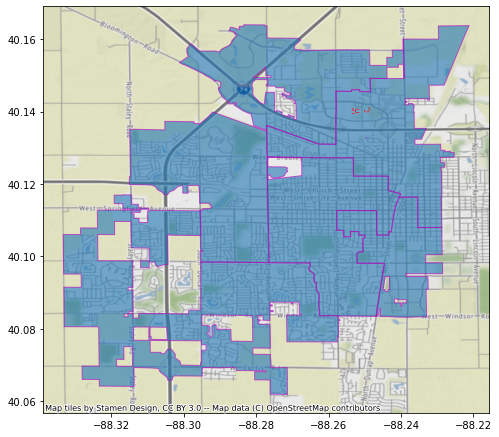

In [64]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

gdf_councils.plot(ax=ax, alpha=0.6, edgecolor='m')
gdf_apts.plot(column='Sprinkler', ax=ax, cmap='rainbow')

ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

(40.12, 40.16)

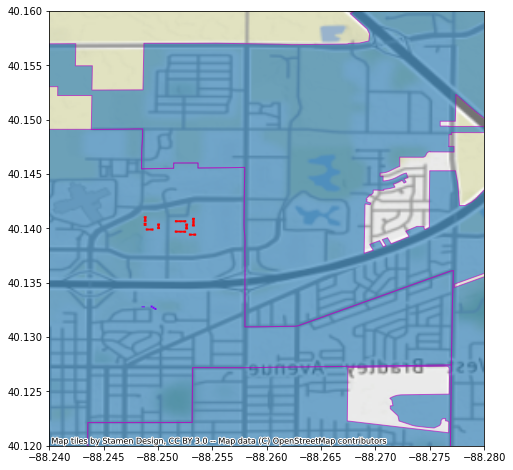

In [65]:
fig, ax = plt.subplots(1,1,figsize=(8,8))


gdf_councils.plot(ax=ax, alpha=0.6, edgecolor='m')
gdf_apts.plot(column='Sprinkler', ax=ax, cmap='rainbow')

ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

ax.set_xlim(-88.24, -88.28)
ax.set_ylim(40.12, 40.16)

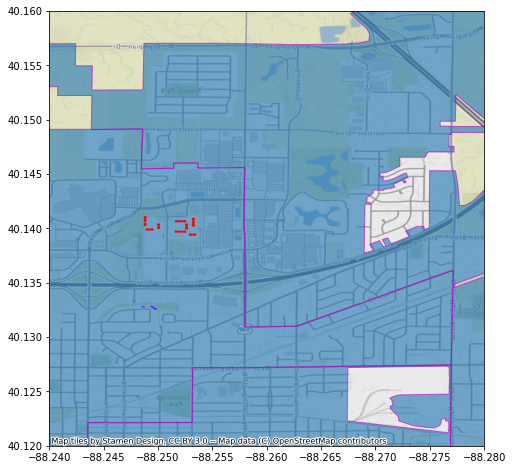

In [66]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

ax.set_xlim(-88.24, -88.28)
ax.set_ylim(40.12, 40.16)

gdf_councils.plot(ax=ax, alpha=0.6, edgecolor='m')
gdf_apts.plot(column='Sprinkler', ax=ax, cmap='rainbow')

ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

/Users/zhangyunjia/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


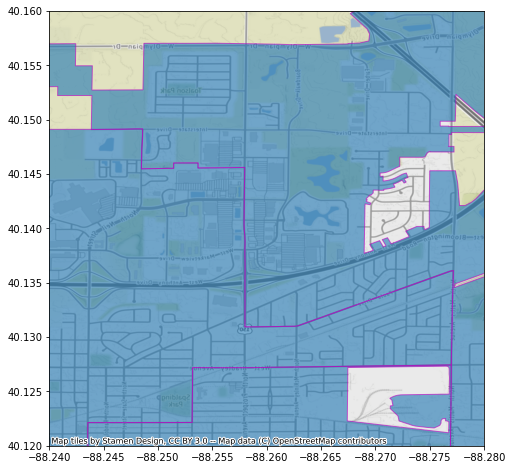

In [67]:
btype = 'Building'

gdf_apts_subset = gdf_apts.loc[gdf_apts['Sprinkler']==btype] # our subsetted dataframe


fig, ax = plt.subplots(1,1,figsize=(8,8))

ax.set_xlim(-88.24, -88.28)
ax.set_ylim(40.12, 40.16)

gdf_councils.plot(ax=ax, alpha=0.6, edgecolor='m')
gdf_apts_subset.plot(column='Sprinkler', ax=ax, cmap='rainbow', categorical=True, legend=True) # look what changes

ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

/Users/zhangyunjia/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


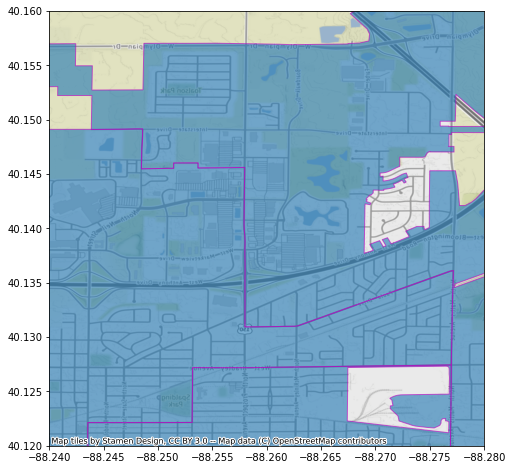

In [68]:
def my_geopandas_plot(btype):
    gdf_apts_subset = gdf_apts.loc[gdf_apts['Sprinkler']==btype] # our subsetted dataframe

    fig, ax = plt.subplots(1,1,figsize=(8,8))

    ax.set_xlim(-88.24, -88.28)
    ax.set_ylim(40.12, 40.16)

    gdf_councils.plot(ax=ax, alpha=0.6, edgecolor='m')
    gdf_apts_subset.plot(column='Sprinkler', ax=ax, cmap='rainbow', categorical=True, legend=True) # look what changes

    ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

    plt.show()
    
my_geopandas_plot('Building')

In [69]:
@ipywidgets.interact(btype=gdf_apts['Sprinkler'].unique())
def my_geopandas_plot(btype):
    gdf_apts_subset = gdf_apts.loc[gdf_apts['Sprinkler']==btype] # our subsetted dataframe

    fig, ax = plt.subplots(1,1,figsize=(8,8))

    ax.set_xlim(-88.24, -88.28)
    ax.set_ylim(40.12, 40.16)

    gdf_councils.plot(ax=ax, alpha=0.6, edgecolor='m')
    gdf_apts_subset.plot(column='Sprinkler', ax=ax, cmap='rainbow', categorical=True, legend=True) # look what changes

    ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

    plt.show()

interactive(children=(Dropdown(description='btype', options=('Yes', None, 'No'), value='Yes'), Output()), _dom…